# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [2]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO: Set up a connection the "Market.db" database
connection = sqlite3.connect('./db/Market.db')

# TODO: Set up the cursor
cursor = connection.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [16]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select Count(*) from Products where Price < 10
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [35]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select Count(*) as Count, Country from Suppliers group by Country order by Count DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(4, 'USA'), (3, 'Germany'), (3, 'France'), (2, 'UK'), (2, 'Sweden'), (2, 'Japan'), (2, 'Italy'), (2, 'Canada'), (2, 'Australia'), (1, 'Spain'), (1, 'Singapore'), (1, 'Norway'), (1, 'Netherlands'), (1, 'Finland'), (1, 'Denmark'), (1, 'Brazil')]


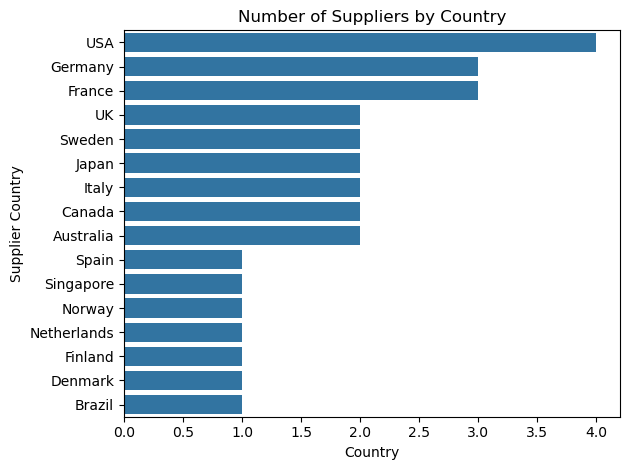

In [37]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['SupplierCountry', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(x='SupplierCountry', y='Count', data=df)
plt.title('Number of Suppliers by Country')
plt.ylabel('Supplier Country')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [41]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select Count(*) as Count, Country from Customers group by Country order by Count DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(13, 'USA'), (11, 'Germany'), (11, 'France'), (9, 'Brazil'), (7, 'UK'), (5, 'Spain'), (5, 'Mexico'), (4, 'Venezuela'), (3, 'Italy'), (3, 'Canada'), (3, 'Argentina'), (2, 'Switzerland'), (2, 'Sweden'), (2, 'Portugal'), (2, 'Finland'), (2, 'Denmark'), (2, 'Belgium'), (2, 'Austria'), (1, 'Poland'), (1, 'Norway'), (1, 'Ireland')]


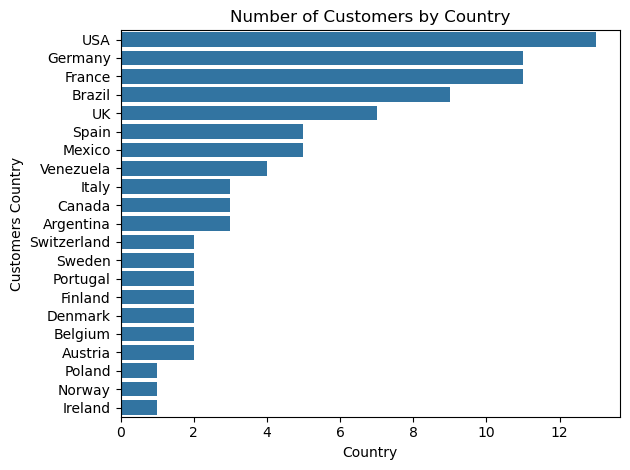

In [44]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['CustomersCountry', 'Count'])

# TODO: Generate a visualization on this dataframe
sns.barplot(x='CustomersCountry', y='Count', data=df)
plt.title('Number of Customers by Country')
plt.ylabel('Customers Country')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select 
        SUM(od.Quantity) as TotalQuantity, p.ProductName 
    from 
        OrderDetails od 
    left join 
        Products p on od.ProductID = p.ProductID 
    group by 
        od.ProductID
    order by 
        TotalQuantity ASC
    limit 
        20
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(5, 'Laughing Lumberjack Lager'), (15, 'Røgede sild'), (18, "Gustaf's Knäckebröd"), (20, 'Mishi Kobe Niku'), (25, "Uncle Bob's Organic Dried Pears"), (25, 'Genen Shouyu'), (27, 'Queso Manchego La Pastora'), (36, "Grandma's Boysenberry Spread"), (39, 'Gravad lax'), (45, 'Röd Kaviar'), (48, 'Filo Mix'), (52, 'Mascarpone Fabioli'), (70, 'Chocolade'), (70, 'Valkoinen suklaa'), (71, 'NuNuCa Nuß-Nougat-Creme'), (77, 'Singaporean Hokkien Fried Mee'), (80, 'Aniseed Syrup'), (85, 'Ikura'), (90, 'Schoggi Schokolade'), (90, 'Louisiana Hot Spiced Okra')]


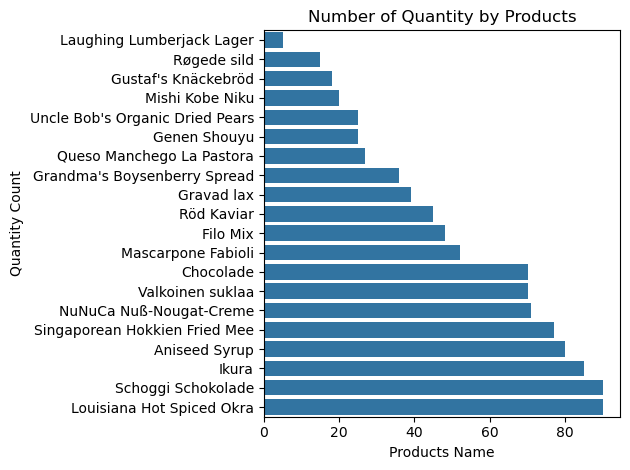

In [52]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['QuantityCount', 'ProductsName'])

# TODO: Generate a visualization on this dataframe
sns.barplot(x='QuantityCount', y='ProductsName', data=df)
plt.title('Number of Quantity by Products')
plt.ylabel('Quantity Count')
plt.xlabel('Products Name')
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [64]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    select 
        p.ProductName,
        SUM(od.Quantity * p.Price) as TotalRevenue
    from 
        OrderDetails od 
    left join 
        Products p 
    on 
        od.ProductID = p.ProductID 
    group by 
        od.ProductID
    order by 
        TotalRevenue ASC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5), ("Jack's New England Clam Chowder", 1341.35), ('Original Frankfurter grüne Soße', 1404), ("Sir Rodney's Scones", 1470), ('Tunnbröd', 1485), ('Louisiana Hot Spiced Okra', 1530), ('Sasquatch Ale', 1540), ('Mascarpone Fabioli', 1664), ('Teatime Chocolate Biscuits', 1665.2), ('Spegesild', 1740), ('Longlife Tofu', 1860), ('Mishi Kobe Niku', 1940), ('Escargots de Bourgogne', 2053.75), ('Tourtière', 2086.0), ("Chef Anton's Cajun S

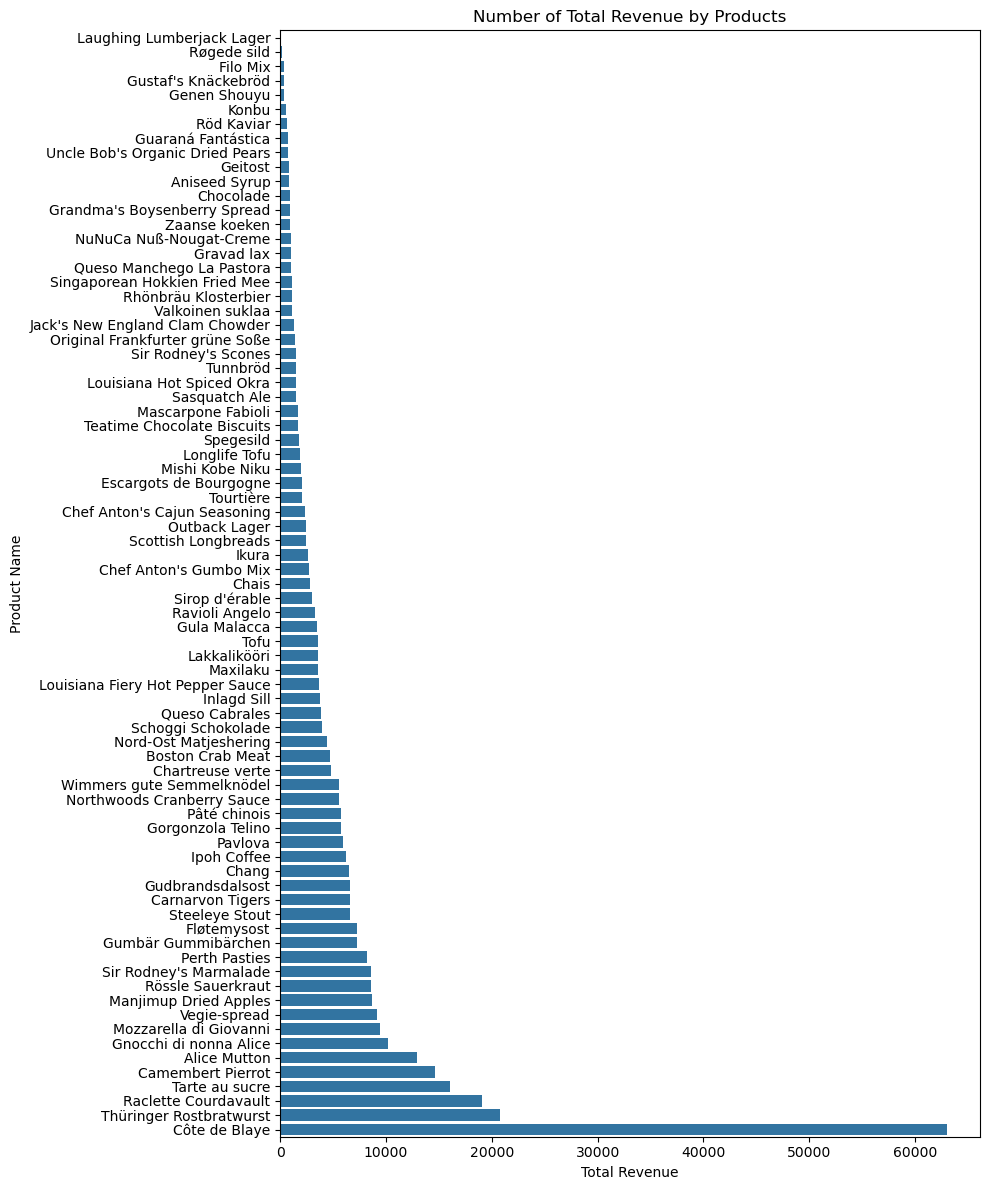

In [68]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalRevenue'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 12)) 
sns.barplot(x='TotalRevenue', y='ProductName', data=df)
plt.title('Number of Total Revenue by Products')
plt.ylabel('Product Name')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [12]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    Select 
        Count(DISTINCT o.OrderID) as TotalOrders, c.Country
    From
        Orders o
    Left Join
        Customers c
    On
        o.CustomerID = c.CustomerID
    Group By
        c.Country
    Order By
        TotalOrders DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(29, 'USA'), (25, 'Germany'), (19, 'Brazil'), (18, 'France'), (13, 'Austria'), (12, 'UK'), (9, 'Venezuela'), (9, 'Mexico'), (9, 'Canada'), (8, 'Finland'), (7, 'Sweden'), (7, 'Spain'), (7, 'Italy'), (6, 'Ireland'), (5, 'Portugal'), (4, 'Switzerland'), (4, 'Denmark'), (2, 'Belgium'), (1, 'Poland'), (1, 'Norway'), (1, 'Argentina')]


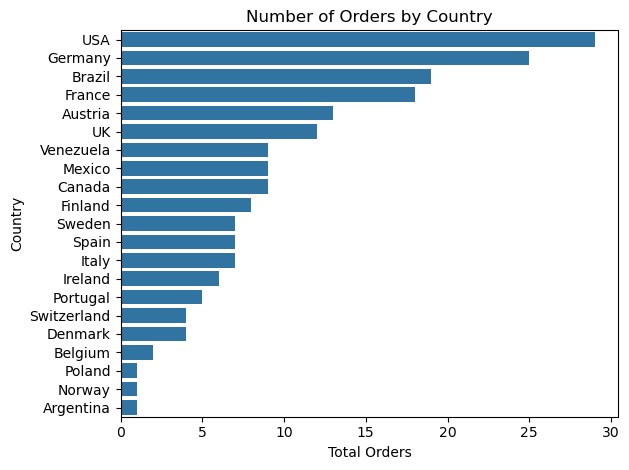

In [13]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'TotalOrders'])

# TODO: Generate a visualization on this dataframe
sns.barplot(x='Country', y='TotalOrders', data=df)
plt.title('Number of Orders by Country')
plt.ylabel('Country')
plt.xlabel('Total Orders')
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [10]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    Select 
        Count(DISTINCT c.CustomerID) as Counts, c.Country
    From
        Orders o
    Right Join
        Customers c
    On
        o.CustomerID = c.CustomerID
    Where
        o.OrderID is NUll
    Group By
        c.Country
    ORDER BY 
        Counts DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(5, 'USA'), (4, 'France'), (2, 'Germany'), (2, 'Argentina'), (1, 'UK'), (1, 'Spain'), (1, 'Canada'), (1, 'Belgium')]


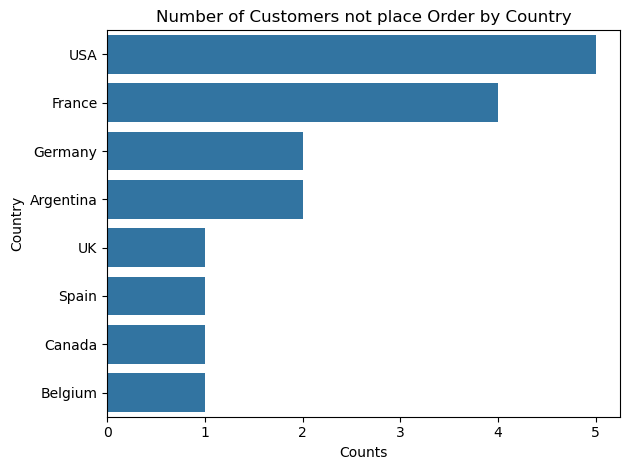

In [11]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Counts'])

# TODO: Generate a visualization on this dataframe
sns.barplot(x='Country', y='Counts', data=df)
plt.title('Number of Customers not place Order by Country')
plt.ylabel('Country')
plt.xlabel('Counts')
plt.tight_layout()
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    Select 
        Count(DISTINCT od.OrderID) as TotalOrders, s.SupplierName
    From 
        OrderDetails od
    Left Join 
        Products p On od.ProductID = p.ProductID
    Left Join 
        Suppliers s On p.SupplierID = s.SupplierID
    Group By
        s.SupplierName
    Order By
        TotalOrders DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(42, 'Plutzer Lebensmittelgroßmärkte AG'), (40, 'Pavlova, Ltd.'), (33, 'Specialty Biscuits, Ltd.'), (32, 'Norske Meierier'), (31, 'Formaggi Fortini s.r.l.'), (26, 'Gai pâturage'), (21, 'Exotic Liquid'), (20, 'Pasta Buttini s.r.l.'), (20, 'New Orleans Cajun Delights'), (19, 'Ma Maison'), (19, 'Karkki Oy'), (19, "G'day, Mate"), (17, 'New England Seafood Cannery'), (17, "Mayumi's"), (17, 'Leka Trading'), (16, 'Bigfoot Breweries'), (15, 'Heli Süßwaren GmbH & Co. KG'), (15, "Forêts d'érables"), (15, 'Aux joyeux ecclésiastiques'), (14, 'Svensk Sjöföda AB'), (12, 'Tokyo Traders'), (11, 'Refrescos Americanas LTDA'), (11, "Cooperativa de Quesos 'Las Cabras'"), (8, 'Nord-Ost-Fisch Handelsgesellschaft mbH'), (8, 'Lyngbysild'), (6, 'PB Knäckebröd AB'), (6, "Grandma Kelly's Homestead"), (4, 'Zaanse Snoepfabriek'), (4, 'Escargots Nouveaux')]


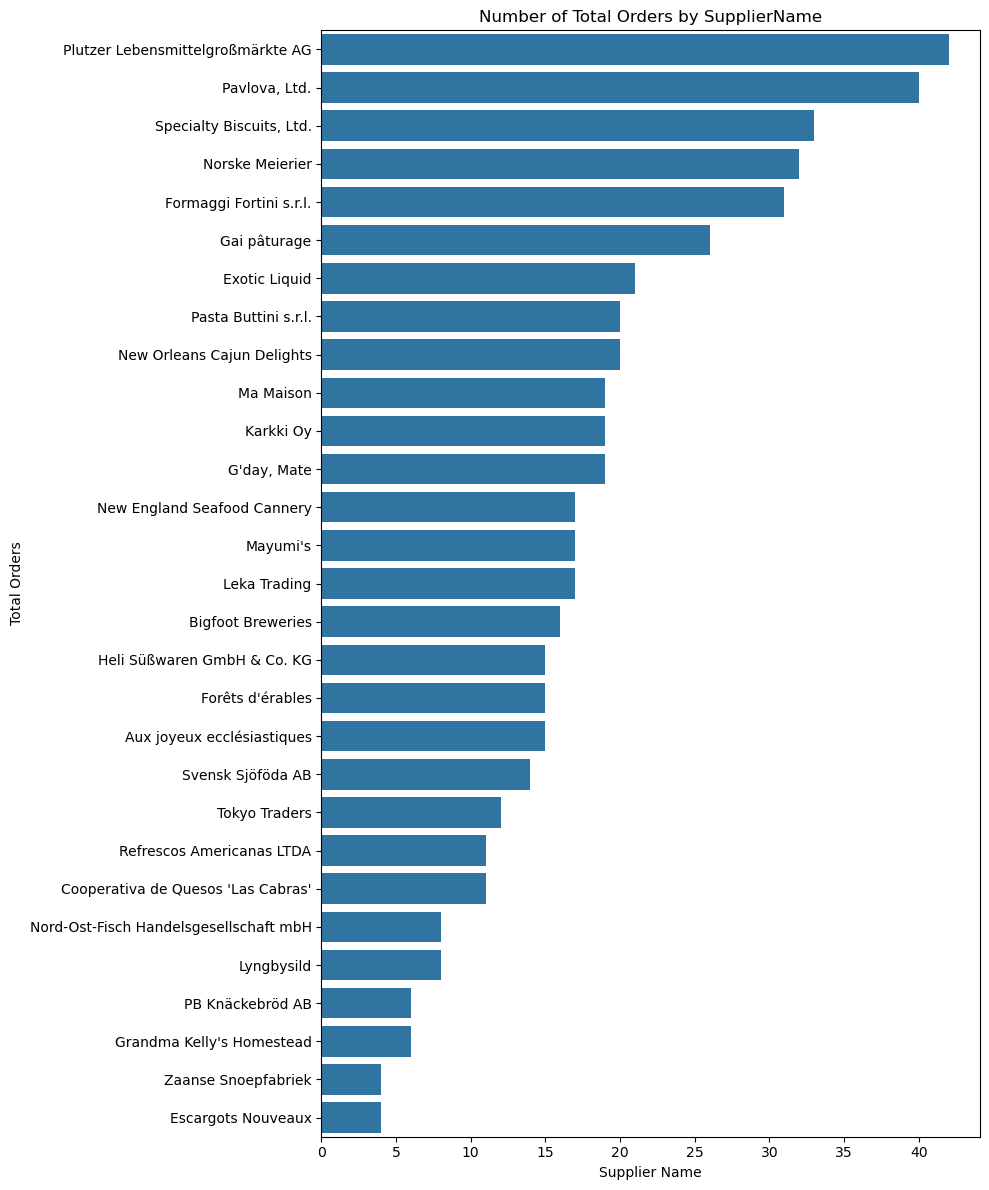

In [9]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['SupplierName', 'TotalOrders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 12)) 
sns.barplot(x='SupplierName', y='TotalOrders', data=df)
plt.title('Number of Total Orders by SupplierName')
plt.ylabel('Total Orders')
plt.xlabel('Supplier Name')
plt.tight_layout()
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The USA has the greatest number of customers, with a total of 13 customers. This result was obtained by grouping the data from the Customers table by country and counting the number of customers in each group. The corresponding visualization chart also highlights this, as the USA has the longest bar, indicating the highest number of customers.

The USA also has the greatest number of suppliers, with a total of 4 suppliers. This was determined by grouping the Suppliers table by country and counting the number of suppliers in each group. The bar chart for suppliers shows that the USA has the longest bar, confirming this finding.

Given that the USA ranks highest in both customer and supplier counts, the evidence suggests that there is a strong positive correlation between the number of customers and the number of suppliers in the USA. 

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

Supplier name “Plutzer Lebensmittelgroßmärkte AG” has the most orders with 42 orders. 42 outcome is come from joining the 'OrderDetail' table for the order information, 'Products' table for getting Suppliers id info, and 'Suppliers' table for getting actual supplier info, then group by the supplier name and count the number of orders for each supplier. Also the visualization of the data shows that the supplier “Plutzer Lebensmittelgroßmärkte AG” has longest bar in the chart, that indicated the highest number of orders.